In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
from seaborn import scatterplot

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dfTrain = pd.read_csv('../Data/train.csv', encoding = 'utf-8', lineterminator="\n")
targetValues = dfTrain['target'].to_frame()
targetValues.columns = ['Values']

In [6]:
dfPOS = pd.read_csv('../Data/POS_Columns.csv', encoding = 'utf-8', lineterminator="\n")

In [7]:
cols = ['Index', 'Sents', 'Words', 'C_W_C', 'S_C',
                'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET','INTJ', 'NOUN', 
                'NUM', 'PART', 'PRON','PROPN', 'PUNCT','SCONJ','SYM','VERB','X']
dfPOS.columns = cols
dfPOS = dfPOS.drop(['Index'], axis = 1)
dfPOS = dfPOS.drop(['X'], axis = 1)

In [8]:
pCorr = dfPOS.corr(method='pearson')

In [9]:
pCorr

,Sents,Words,C_W_C,S_C,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB
Sents,1.000000,0.246253,-0.172172,-0.013029,-0.111711,-0.324174,0.043229,0.223342,-0.180789,-0.076608,0.265827,0.034673,0.001979,0.210081,0.252799,0.141487,0.508842,-0.155351,0.003420,0.456046
Words,0.246253,1.000000,0.117852,0.606382,0.195407,0.335980,0.265731,0.293300,0.198870,0.328431,0.079937,0.296995,0.081913,0.210678,0.242022,0.055043,0.307742,0.199152,0.027631,0.392869
C_W_C,-0.172172,0.117852,1.000000,0.827403,0.425889,0.299289,-0.219754,-0.005326,-0.119131,0.090916,-0.263091,0.540588,0.091749,-0.163032,-0.531716,0.007983,-0.246193,-0.092147,0.134699,-0.307361
S_C,-0.013029,0.606382,0.827403,1.000000,0.471324,0.425044,-0.042571,0.113889,0.010496,0.247594,-0.182929,0.611888,0.130675,-0.058851,-0.346052,0.045041,-0.041323,0.008125,0.119011,-0.047118
ADJ,-0.111711,0.195407,0.425889,0.471324,1.000000,0.190039,-0.068978,-0.014330,0.064155,0.056729,-0.143466,0.291807,0.028198,-0.214705,-0.327493,-0.066487,-0.103678,-0.145838,0.064087,-0.367961
ADP,-0.324174,0.335980,0.299289,0.425044,0.190039,1.000000,-0.128090,-0.178734,-0.021836,0.402948,-0.217973,0.332543,0.185291,-0.310495,-0.308484,0.042173,-0.245940,-0.173484,0.060652,-0.358274
ADV,0.043229,0.265731,-0.219754,-0.042571,-0.068978,-0.128090,1.000000,0.174791,0.164826,-0.156129,0.151865,-0.308559,-0.074431,0.135882,0.344881,-0.115519,0.199838,0.241404,-0.058837,0.228901
AUX,0.223342,0.293300,-0.005326,0.113889,-0.014330,-0.178734,0.174791,1.000000,-0.108271,-0.088659,0.095186,-0.098632,-0.070132,0.222018,0.223002,-0.064983,0.100880,0.254378,0.000528,0.100590
CCONJ,-0.180789,0.198870,-0.119131,0.010496,0.064155,-0.021836,0.164826,-0.108271,1.000000,-0.097513,0.020034,-0.002898,-0.105526,-0.047073,0.111496,-0.072595,0.100358,-0.053034,-0.081403,0.065927
DET,-0.076608,0.328431,0.090916,0.247594,0.056729,0.402948,-0.156129,-0.088659,-0.097513,1.000000,-0.112179,0.296673,0.048804,-0.226566,-0.312937,-0.042902,-0.115700,-0.112371,-0.029925,-0.127061


In [10]:
currCols = [cols[i] for i in range(1,len(cols)-1)]

In [11]:
for column in currCols:
    temp = dfPOS[column].to_frame().join(targetValues)
    print(temp.corr(method='pearson'))

           Sents    Values
Sents   1.000000  0.357732
Values  0.357732  1.000000
           Words    Values
Words   1.000000 -0.120652
Values -0.120652  1.000000
           C_W_C    Values
C_W_C   1.000000 -0.490845
Values -0.490845  1.000000
             S_C    Values
S_C     1.000000 -0.455607
Values -0.455607  1.000000
             ADJ    Values
ADJ     1.000000 -0.238013
Values -0.238013  1.000000
             ADP    Values
ADP     1.000000 -0.443499
Values -0.443499  1.000000
             ADV    Values
ADV     1.000000  0.105781
Values  0.105781  1.000000
             AUX    Values
AUX     1.000000  0.029233
Values  0.029233  1.000000
           CCONJ    Values
CCONJ   1.000000  0.014322
Values  0.014322  1.000000
             DET    Values
DET     1.000000 -0.216317
Values -0.216317  1.000000
            INTJ    Values
INTJ    1.000000  0.223467
Values  0.223467  1.000000
            NOUN    Values
NOUN    1.000000 -0.247965
Values -0.247965  1.000000
             NUM    Values
N

In [12]:
for column in currCols:
    temp = dfPOS[column].to_frame().join(targetValues)
    print(temp.corr(method='spearman'))

           Sents    Values
Sents   1.000000  0.356976
Values  0.356976  1.000000
           Words    Values
Words   1.000000 -0.114061
Values -0.114061  1.000000
           C_W_C    Values
C_W_C   1.000000 -0.507945
Values -0.507945  1.000000
             S_C    Values
S_C     1.000000 -0.451144
Values -0.451144  1.000000
             ADJ    Values
ADJ     1.000000 -0.244622
Values -0.244622  1.000000
             ADP    Values
ADP     1.000000 -0.445923
Values -0.445923  1.000000
             ADV    Values
ADV     1.000000  0.119014
Values  0.119014  1.000000
             AUX    Values
AUX     1.000000  0.029198
Values  0.029198  1.000000
           CCONJ    Values
CCONJ   1.000000  0.005472
Values  0.005472  1.000000
             DET    Values
DET     1.000000 -0.209667
Values -0.209667  1.000000
            INTJ    Values
INTJ    1.000000  0.253601
Values  0.253601  1.000000
            NOUN    Values
NOUN    1.000000 -0.250892
Values -0.250892  1.000000
             NUM    Values
N

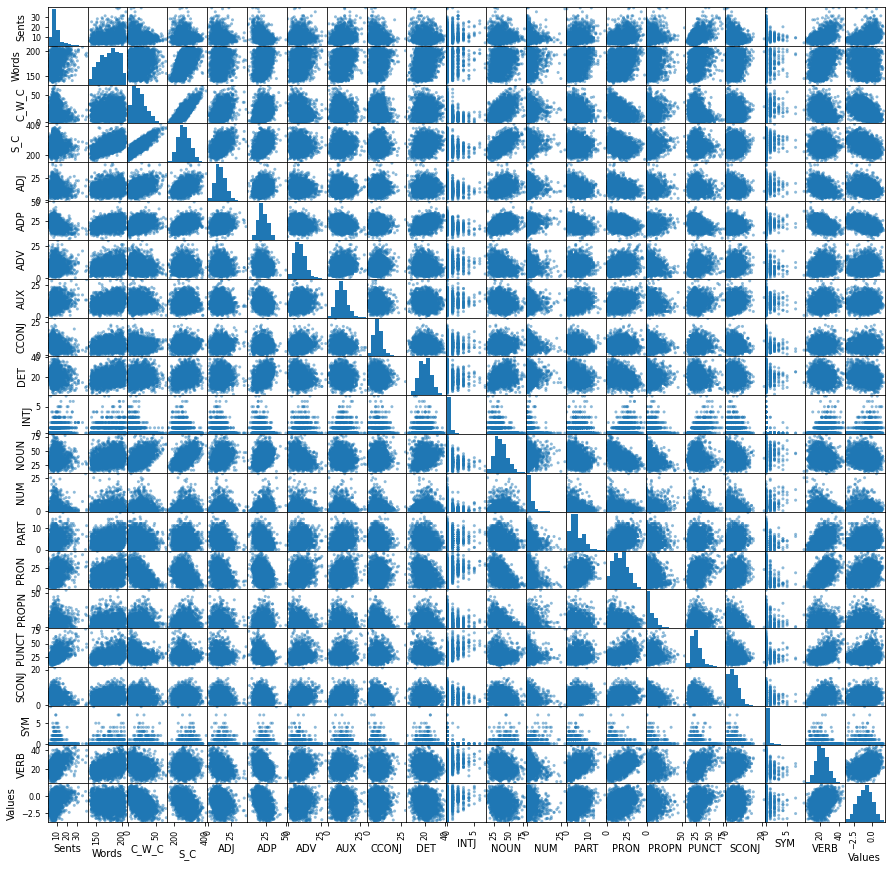

In [13]:
m = scatter_matrix(dfPOS.join(targetValues), figsize=(15, 15))

In [14]:
pca = PCA()

In [15]:
pca.fit(dfPOS)

PCA()

In [16]:
pca.explained_variance_ratio_

array([7.27708369e-01, 1.16977157e-01, 3.73536018e-02, 2.90357406e-02,
       2.34261353e-02, 1.27520634e-02, 9.49156129e-03, 8.83920452e-03,
       7.33922961e-03, 6.53613755e-03, 4.66518451e-03, 3.91811535e-03,
       3.10113536e-03, 2.92708966e-03, 2.72735427e-03, 1.72924491e-03,
       1.24016922e-03, 1.40142794e-04, 8.97868270e-05, 2.57728039e-06])

In [17]:
LR = Pipeline(steps =[('scaler', StandardScaler()), ('linear_regressor',  LinearRegression())])
PCR = Pipeline(steps =[('scaler', StandardScaler()), ('pca', PCA(n_components=3)), ('linear_regressor',  LinearRegression())])

In [18]:
PCR.fit(dfPOS, targetValues)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('linear_regressor', LinearRegression())])

In [19]:
LR_scores = cross_val_score(LR, dfPOS, targetValues,scoring="neg_mean_absolute_error", cv=10)
LR_scores = -LR_scores
print(f"Linear Regression\nScores:\n{LR_scores}\nMean:{LR_scores.mean()}\nSTD:{LR_scores.std()}")

Linear Regression
Scores:
[0.58748557 0.71196154 0.7370633  0.71674263 0.62605086 0.65625646
 0.68822282 0.65913333 0.5167674  0.65089023]
Mean:0.6550574135380975
STD:0.06279724083745179


In [20]:
pca_scores = cross_val_score(PCR, dfPOS, targetValues, scoring="neg_mean_absolute_error", cv=10)

In [21]:
print(f"PCA Regression\nScores:\n{-pca_scores}\nMean:{-pca_scores.mean()}\nSTD:{pca_scores.std()}")

PCA Regression
Scores:
[0.61280264 0.73630442 0.88118172 0.77239329 0.71362282 0.72922913
 0.75350864 0.74632427 0.54135137 0.71988025]
Mean:0.7206598530428956
STD:0.08621736805881977


In [22]:
param_grid = {
    "pca__n_components": [1, 5, 10, 15, 20],
}

In [23]:
search = GridSearchCV(PCR, param_grid, scoring="neg_mean_absolute_error", cv=10)

In [24]:
search.fit(dfPOS, targetValues)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
search.cv_results_

Best parameter (CV score=-0.655):
{'pca__n_components': 20}


{'mean_fit_time': array([0.01665196, 0.01427188, 0.03044307, 0.02023528, 0.01205199]),
 'std_fit_time': array([0.00140984, 0.00044514, 0.01043744, 0.00146658, 0.00094277]),
 'mean_score_time': array([0.00219784, 0.00234773, 0.00315623, 0.00228779, 0.00232699]),
 'std_score_time': array([0.00040715, 0.00046333, 0.00077623, 0.00042359, 0.00043807]),
 'param_pca__n_components': masked_array(data=[1, 5, 10, 15, 20],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'pca__n_components': 1},
  {'pca__n_components': 5},
  {'pca__n_components': 10},
  {'pca__n_components': 15},
  {'pca__n_components': 20}],
 'split0_test_score': array([-0.62890185, -0.60469983, -0.60076155, -0.58644802, -0.58748557]),
 'split1_test_score': array([-0.7488979 , -0.76234094, -0.74085954, -0.74030263, -0.71196154]),
 'split2_test_score': array([-0.82648039, -0.84983387, -0.79674298, -0.77360158, -0.7370633 ]),
 'split3_test_score': array([-0.74